In [2]:
from models.grad_cam import CNN_grad_cam, heatmap_grad_cam, heatmap_in_image
import torch
import torchvision
import torch.nn as nn
from torchinfo import summary
import torchvision.transforms as transforms
from torch.utils import data
import numpy as np  
import matplotlib.pyplot as plt 
import cv2

In [3]:
mean0 =torch.tensor([0.5832, 0.5832, 0.5832])
std0  =torch.tensor([0.1413, 0.1413, 0.1413])
std_normalise_0 = transforms.Normalize(
    mean=mean0,
    std=std0
)

trans0 = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        std_normalise_0
])

In [27]:
data_for_grad_cam = torchvision.datasets.ImageFolder('archive/chest_xray/plot_grad_cam', transform=trans0)
dataloader_grad_cam = data.DataLoader(data_for_grad_cam, shuffle=False, batch_size=1)

In [5]:
model_trained = torch.load('models/model.pth')

In [6]:
test_grad_cam = CNN_grad_cam(model_trained)

In [7]:
for i, (img, label) in enumerate(dataloader_grad_cam):
    if i == 6:
        break
label


tensor([1])

In [8]:
heatmap = heatmap_grad_cam(test_grad_cam, img)

In [9]:
joint_img = heatmap_in_image(img, heatmap, 0.9, .8)

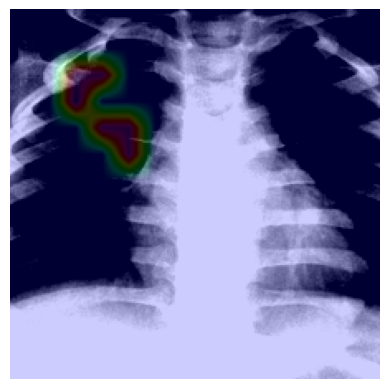

In [10]:
plt.imshow(joint_img)
plt.axis('off')
plt.show()

In [75]:
def display_datasets_heatmap(dataloader, n=2, classes=('NORMAL','PNEUMONIA')):
    # calculate the number of rows and columns for subplots
    num_rows = 2
    num_cols = n // 2
    
    # create the subplots with reduced vertical spacing
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 7), gridspec_kw={'wspace': .5, 'hspace': 0.5})
    
    for i, (img, label) in enumerate(dataloader):
        if i == n:
            break
        heatmap = heatmap_grad_cam(test_grad_cam, img)
        joint_img = heatmap_in_image(img=img, heatmap=heatmap, threshold=0.8, mixture=0.8)
        
        # calculate the row and column indices for the current subplot
        row_idx = i // num_cols
        col_idx = i % num_cols
        
        # plot the image in the corresponding subplot
        axs[row_idx, col_idx].imshow(joint_img)
        axs[row_idx, col_idx].set_title(classes[label])
        axs[row_idx, col_idx].axis('off')
        
    plt.show()


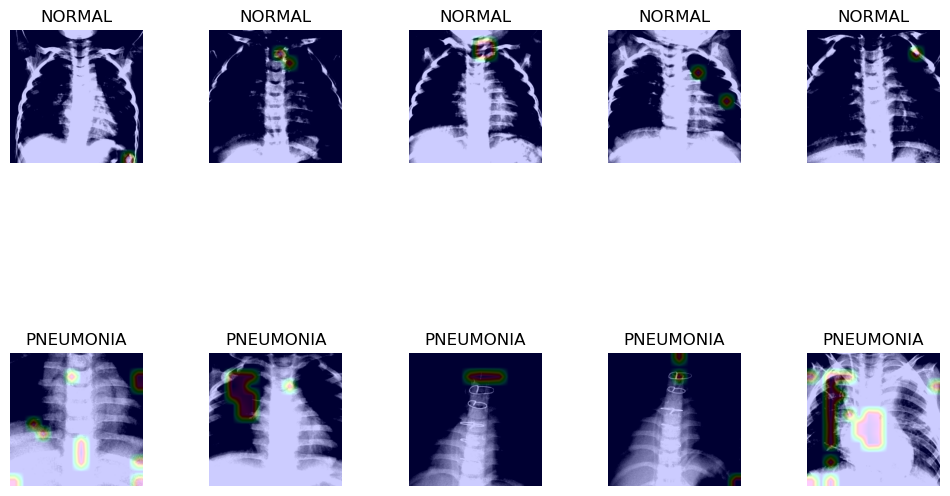

In [76]:
display_datasets_heatmap(dataloader_grad_cam, n=10)